# <span style="color:red"> Laboratorio di Simulazione Numerica (LSN) </span>
## <span style="color:green"> Esercitazione Numerica #01</span>

Durante questa prima esercitazione numerica, abbiamo dovuto familiarizzare con due concetti fondamentali, che ci hanno poi accompagnato nel resto del corso, ovvero: 
1. Generatori di numeri causali e campionamento di distribuzioni di probabilità discrete e continue;
2. Metodo a blocchi (**Block Method**) per il calcolo delle medie e delle incertezze statistiche.

Prima di addentrarci nella descrizione vera e propria dello svolgimento degli esercizi, è importante sottolineare l'importanza del metodo a blocchi all'interno di un programma che sfrutta simulazioni di tipo Monte Carlo. La potenza di questo algoritmo si basa fondamentalmente sulla possibilità di poter applicare il **Teorema del Limite Centrale**, avendo a disposizione un campione di dati *'sufficientemente'*  grande. Questo campione viene infatti suddiviso in un numero *'adeguato'* di blocchi, per ognuno dei quali viene calcolato il rispettivo valor medio. A questo punto è evidente che, prendendo come nuovo campione di dati l'insieme dei valori medi, diventa possibile, con ottima approssimazione, trascurare le eventuali correlazioni tra i dati di partenza, permettendoci quindi di soddisfare le ipotesi iniziali del teorema del limite centrale e di calcolare sia valor medio che incertezza statistica **"on the fly"**, ovvero man mano che il programma gira sul nostro compilatore.

<font color="blue">**N.B.**</font> il significato dei termini *'sufficientemente'* e *'adeguato'* in questo contesto verrà giustificato più avanti.



### <span style="color:darkorange"> Esercizio 01.1</span>

La prima parte dell'esercitazione, consisteva nel campionare un insieme di $M = 10^4$ variabili (pseudo)casuali distribuite uniformemente nell'intervallo $[0,1)$. Per fare ciò, abbiamo potuto sfruttare il codice fornito come materiale didattico, che permetteva di campionare numeri estratti secondo distribuzioni di probabilità uniforme e normale ($i.e.$ gaussiana). Partendo da questo campione di variabili, abbiamo quindi potuto applicare il metodo a blocchi per calcolarne sia il valore medio, sia la varianza accompagnati dalle rispettive incertezze statistiche. Di seguito sono riportate sia le definizioni di valore medio e varianza, sia il loro valore teorico calcolato analiticamente. 

$$\langle r \rangle = \int_0^1 r dr = \frac{1}{2}$$
$$\sigma^2 = \langle (r-\langle r \rangle)^2 \rangle = \int_0^1 \left( r - \frac{1}{2} \right)^2 dr = \frac{1}{12}$$

Più in particolare, nel mio codice, ho implementato un numero di blocchi $N = 100$, di modo che ognuno di essi contenesse un campione di dati pari a $L = \frac{M}{N} = 100$. Sfruttando il BM ho quindi calcolato "on the fly" valor medio e varianza accompagnati da incertezze e ho potuto studiare il loro andamento in funzione del numero di blocchi utilizzati durante la simulazione.

Nello specchietto di Python riportato di seguito, è presente un codice che mostra per via grafica i risultati ottenuti confrontati con i valori attesi.

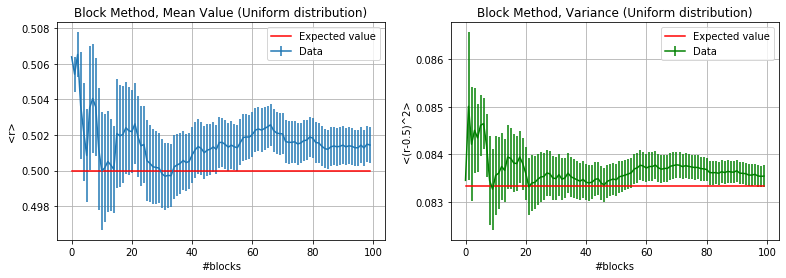

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

nblocks=100
x = np.arange(nblocks)
real = np.zeros(nblocks)

mean,err_mean = np.loadtxt("Esercizio1.1/BM-mean.txt", usecols=(0,1), delimiter=' ', unpack='true')
var,err_var = np.loadtxt("Esercizio1.1/BM-variance.txt", usecols=(0,1), delimiter=' ', unpack='true')

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.errorbar(x,mean,err_mean,label='Data')
plt.xlabel('#blocks')
plt.ylabel('<r>')
plt.title('Block Method, Mean Value (Uniform distribution)')
plt.grid(True)
plt.plot(x,real+1/2,color='r',label='Expected value')
plt.legend()

plt.subplot(132)
plt.errorbar(x,var,err_var,color='g',label='Data')
plt.xlabel('#blocks')
plt.ylabel('<(r-0.5)^2>')
plt.title('Block Method, Variance (Uniform distribution)')
plt.grid(True)
plt.plot(x,real+1/12,color='r',label='Expected value')
plt.legend()

plt.show()

Come si osserva dai grafici mostrati sopra, i risultati delle due simulazioni, ottenuti applicando il metodo a blocchi, sono in accordo con i valori teorici predetti e tendono a convergere verso questi ultimi.

Successivamente ci siamo interrogati sulla possibilità di verificare se il nostro campioni di dati seguisse effettivamente una distribuzione di probabilità uniforme, argomento non scontato in quanto i numeri sono stati generati per mezzo di algoritmi deterministici. In particolare, abbiamo visto che tale verifica può essere condotta sfruttando il **Test del Chi Quadro**, ovvero calcolando la grandezza $\chi^2$, definita come misura dello scarto quadratico medio tra il valore misurato e quello atteso. Per applicare questo test, abbiamo preso l'intervallo $[0,1]$ e l'abbiamo diviso in $M = 100$ sottointervalli identici. Sfruttando poi il nostro generatore di numeri (pseudo)casuali, abbiamo costruito un campione di $N = 10^6$ numeri estratti uniformemente nell'intervallo $[0,1)$. Abbiamo quindi diviso questo insieme di dati in $100$ gruppi equipartiti, per ognuno dei quali abbiamo in seguito calcolato il valore di $\chi_j$, per $j = 1,2,3,...,100$ sfruttando la seguente definizione:

$$\chi_j^2 = \sum_{i=1}^M \frac{\left( n_i - \frac{n}{M} \right)^2}{\frac{n}{M}}$$

dove $n_i$ è il numero di dati che cadono nel sottointervallo $i$-esimo $ \left[ \frac{i-1}{M},\frac{i}{M} \right)$, mentre $n$ è il numero totale di dati campionati all'interno ogni gruppo. Supponendo che i nostri dati seguano effettivamente una distribuzione di probabilità uniforme, ci si aspetterebbe di ottenere un valore di $\chi^2 \simeq 100$.

Di seguito è riportato uno specchietto che mostra l'andamento dei valori di $\chi_j$ ottenuti con la simulazione.

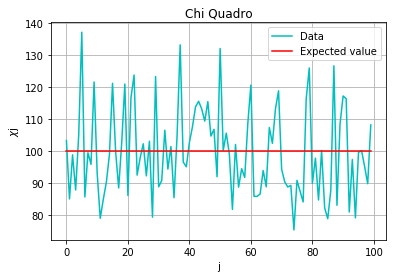

In [3]:
N = 100
x = np.arange(N)
real = np.zeros(N)

chi = np.loadtxt("Esercizio1.1/chiquadro.txt", usecols=(0), delimiter=' ', unpack='true')

plt.plot(x,chi,color='c',label='Data')
plt.xlabel('j')
plt.ylabel('$\chi$j')
plt.title('Chi Quadro')
plt.grid(True)
plt.plot(x,real+100,color='r',label='Expected value')
plt.legend()

plt.show()

Realisticamente, come anche mostrato dai risultati della mia simulazione, mi aspetto che il valore di $\chi^2$ tenda a fluttuare intorno al valore atteso. Ciò, come detto sopra, è dovuto al fatto che i dati utilizzati vengono estratti in modo (pseudo)randomico per mezzo di processi deterministici.

### <span style="color:darkorange"> Esercizio 01.2</span>

Nel secondo esercizio, abbiamo invece dovuto implementare, all'interno del nostro codice, il campionamento di variabili secondo particolari distribuzioni di probabilità con lo scopo di testare il Teorema del Limite Centrale. Le distribuzioni campionate sono le seguenti:

1. Distribuzione Uniforme tra $\{1,2,3,4,5,6\}$, per simulare il lancio di un dado standard;
2. Distribuzione Esponenziale $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ con $\lambda = 1$;
3. Distribuzione di Cauchy-Lorentz $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ con $\mu = 0$ e $\Gamma = 1$.

Per implementare la prima distribuzione, ho riciclato il generatore di numeri casuali già utilizzato nell'esercizio precedente. Una volta estrapolato un campione di $10^4$ variabili (pseudo)casuali $x_i$, ho potuto calcolare le quantità $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (per $N=1,2,10,100$), che sono poi state conteggiate all'interno di appositi istogrammi.

I risultati ottenuti sono riportati nello specchietto Python di seguito. In particolare, per $S_{100}$ ho potuto fittare l'andamento dell'istogramma ottenuto, con una curva di tipo gaussiano $F_{Gauss}(x) = ae^{-b(x-c)^2}$.

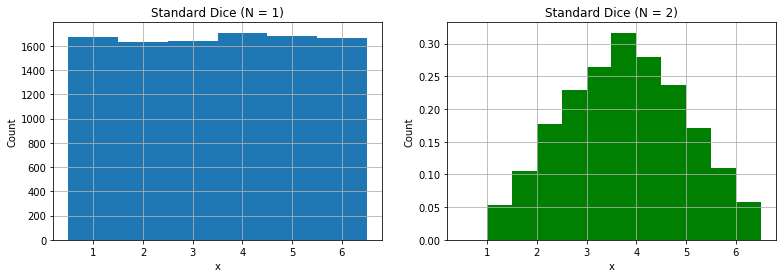

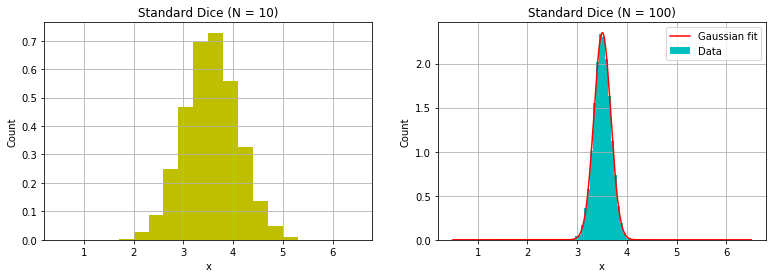

Fitting function:
 Optimized parameter  [a,b,c] = [ 2.35055008 17.42886639  3.50580879]
 Parameter uncertainty = [0.00552159 0.09455026 0.00045943]


In [4]:
from scipy.optimize import curve_fit

def gaussian(x,a,b,c):  # defining the fitting function (Gaussian)
    return a * np.exp(-b*(x-c)**2)

S1,S2,S10,S100 = np.loadtxt("Esercizio1.2/standard.txt", usecols=(0,1,2,3), delimiter=' ', unpack='true')

n_bins = 6
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Standard Dice (N = 1)')
n, bins, patches = plt.hist(S1, n_bins, range=(0.5,6.5))
plt.grid(True)

n_bins = 12
plt.subplot(132)
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Standard Dice (N = 2)')
n, bins, patches = plt.hist(S2, n_bins, density=True, facecolor='g', range=(0.5,6.5))
plt.grid(True)

n_bins = 20
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Standard Dice (N = 10)')
n, bins, patches = plt.hist(S10, n_bins, density=True, facecolor='y', range=(0.5,6.5))
plt.grid(True)

n_bins = 100
plt.subplot(132)
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Standard Dice (N = 100)')
n, bins, patches = plt.hist(S100, n_bins, density=True, facecolor='c', range=(0.5,6.5),label='Data')
plt.grid(True)

bin_centers = bins[:-1] + np.diff(bins) / 2
p_opt, p_cov = curve_fit(gaussian, bin_centers, n, p0=[1., 0., 1.])

x_fit = np.linspace(bins[0], bins[-1], 10000)
plt.plot(x_fit, gaussian(x_fit, *p_opt), label='Gaussian fit',color='r')
plt.legend()

plt.show()

print("Fitting function:")
print(" Optimized parameter  [a,b,c] = "+str(p_opt))
print(" Parameter uncertainty = "+str(np.sqrt(np.diagonal(p_cov))))

Come si osserva dal grafico sopra riportato, il fit utilizzato descrive con ottima approssimazione il trend osservato all'interno del nostro campione di dati, permettendoci allo stesso tempo di corroborare la validità del Teorema del Limite Centrale.

Per quanto riguarda la seconda distribuzione di probabilità, essa è stata implementata all'interno del codice attraverso il metodo dell'**Inversione della Cumulativa**. Grazie ad esso, si può infatti dimostrare che, una volta estratto uniformemente un numero $t$ dall'intervallo $[0,1)$, diventa possibile campionare variabili distribuite in modo esponenziale semplicemente applicando la seguente formula.

$$x = -\frac{1}{\lambda}ln(1-t)$$

Anche in questo caso abbiamo costruito $4$ istogrammi riempiendoli con i valori di $S_N = \frac{1}{N}\sum_{i=1}^N x_i$, per $N=1,2,10,100$.

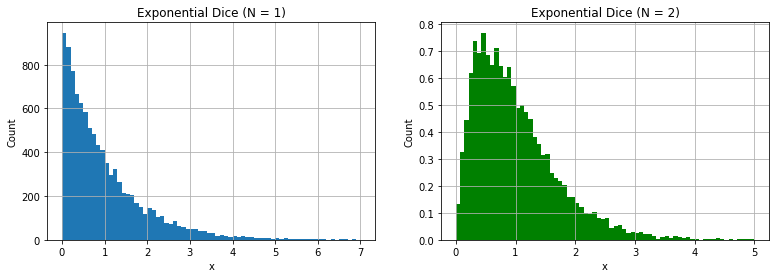

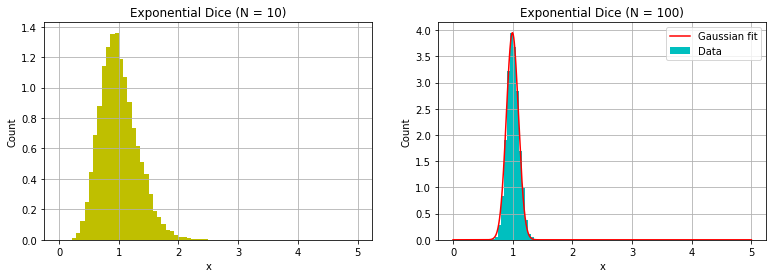

Fitting function:
 Optimized parameter  [a,b,c] = [ 3.95014401 49.10630708  0.99544408]
 Parameter uncertainty = [0.02020551 0.58008488 0.000596  ]


In [5]:
S1,S2,S10,S100 = np.loadtxt("Esercizio1.2/exponential.txt", usecols=(0,1,2,3), delimiter=' ', unpack='true')

n_bins = 70
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Exponential Dice (N = 1)')
n, bins, patches = plt.hist(S1, n_bins, range=(0,7))
plt.grid(True)

plt.subplot(132)
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Exponential Dice (N = 2)')
n, bins, patches = plt.hist(S2, n_bins, density=True, facecolor='g', range=(0,5))
plt.grid(True)

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Exponential Dice (N = 10)')
n, bins, patches = plt.hist(S10, n_bins, density=True, facecolor='y', range=(0,5))
plt.grid(True)

n_bins = 100
plt.subplot(132)
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Exponential Dice (N = 100)')
n, bins, patches = plt.hist(S100, n_bins, density=True, facecolor='c', range=(0,5),label='Data')
plt.grid(True)
plt.legend()

bin_centers = bins[:-1] + np.diff(bins) / 2
p_opt, p_cov = curve_fit(gaussian, bin_centers, n, p0=[1., 0., 1.])

x_fit = np.linspace(bins[0], bins[-1], 10000)
plt.plot(x_fit, gaussian(x_fit, *p_opt), label='Gaussian fit',color='r')
plt.legend()

plt.show()

print("Fitting function:")
print(" Optimized parameter  [a,b,c] = "+str(p_opt))
print(" Parameter uncertainty = "+str(np.sqrt(np.diagonal(p_cov))))

Ripercorrendo quanto fatto in precedenza, ho fittato l'istogramma assocciato a $S_{100}$ con una generica gaussiana e ho verificato anche in questo caso la validità del Teorema del Limite Centrale.

Per campionare la terza ed ultima distribuzione di probabilità, è stato utilizzato nuovamente il metodo dell'inversione della cumulativa e si è ottenuta la formula seguente.

$$x = \Gamma tan \left[ \pi \left(t - \frac{1}{2} \right) \right]$$

dove $t$ è una variabile estratta uniformemente nell'intervallo $[0,1)$. Gli istogrammi ottenuti utilizzando un campione di variabili estratte secondo una distribuzione di probabilità di Cauchy-Lorentz, sono mostrati nel pannello sottostante.

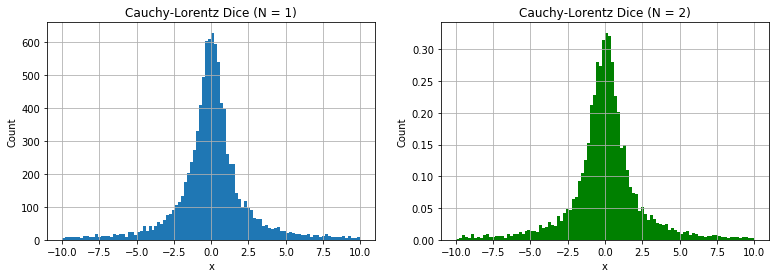

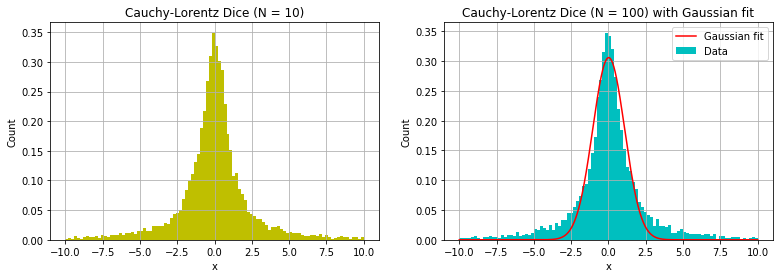

Fitting function:
 Optimized parameter  [a,b,c] = [0.30595189 0.43518611 0.01582071]
 Parameter uncertainty = [0.00698605 0.02294807 0.02826196]


In [7]:
S1,S2,S10,S100 = np.loadtxt("Esercizio1.2/cauchy.txt", usecols=(0,1,2,3), delimiter=' ', unpack='true')

n_bins = 100
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Cauchy-Lorentz Dice (N = 1)')
n, bins, patches = plt.hist(S1, n_bins, range=(-10,10))
plt.grid(True)

plt.subplot(132)
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Cauchy-Lorentz Dice (N = 2)')
n, bins, patches = plt.hist(S2, n_bins, density=True, facecolor='g', range=(-10,10))
plt.grid(True)

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Cauchy-Lorentz Dice (N = 10)')
n, bins, patches = plt.hist(S10, n_bins, density=True, facecolor='y', range=(-10,10))
plt.grid(True)

plt.subplot(132)
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Cauchy-Lorentz Dice (N = 100) with Gaussian fit')
n, bins, patches = plt.hist(S100, n_bins, density=True, facecolor='c', range=(-10,10),label='Data')
plt.grid(True)

bin_centers = bins[:-1] + np.diff(bins) / 2
p_opt, p_cov = curve_fit(gaussian, bin_centers, n, p0=[1., 0., 1.])

x_fit = np.linspace(bins[0], bins[-1], 10000)
plt.plot(x_fit, gaussian(x_fit, *p_opt), label='Gaussian fit',color='r')
plt.legend()

plt.show()

print("Fitting function:")
print(" Optimized parameter  [a,b,c] = "+str(p_opt))
print(" Parameter uncertainty = "+str(np.sqrt(np.diagonal(p_cov))))

Contrariamente ai due casi precedenti, vediamo che l'andamento gaussiano non è rispettato dall'istogramma relativo a $S_{100}$, che tende a discostarsi in modo evidente dal classico andamento a campana. Questo comportamento si può attribuire alla violazione di una delle ipotesi iniziali del Teorema del Limite Centrale. Si può infatti dimostrare che, dato un campione di variabili estratte attraverso una distribuzione di probabilità di Cauchy-Lorentz, esso sarà caratterizzato da una varianza infinita incompatibile con un attrattore di tipo gaussiano. Tuttavia, in questo caso particolare, è possibile comunque riferirsi ad un preciso punto fisso rappresentato da una Lorentziana del tipo:

$$F_{Lorentz}(x) = a \frac{\Gamma ^2}{\Gamma ^2 + (x - x_0)^2}$$

Come riportato di seguito, l'andamento dei dati all'interno dell'istogramma tende effettivamente a seguire un trend di tipo Lorentziano, in accordo con quanto atteso.

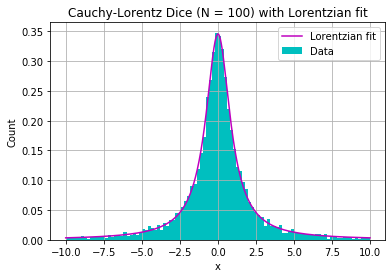

Fitting function:
 Optimized parameter  [x0,a,gamma] = [0.00749126 0.34560562 0.97829835]
 Parameter uncertainty = [0.00620904 0.0021943  0.00879616]


In [8]:
def lorentzian( x, x0, a, gamma ):
    return a * gamma**2 / ( gamma**2 + ( x - x0 )**2)

plt.figure()
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Cauchy-Lorentz Dice (N = 100) with Lorentzian fit')
n, bins, patches = plt.hist(S100, n_bins, density=True, facecolor='c', range=(-10,10),label='Data')
plt.grid(True)

bin_centers = bins[:-1] + np.diff(bins) / 2
popt, patches = curve_fit(lorentzian, bin_centers, n, p0=[1., 0., 1.])

x_fit = np.linspace(bins[0], bins[-1], 10000)
plt.plot(x_fit, lorentzian(x_fit, *popt), label='Lorentzian fit',color='m')
plt.legend()

plt.show()

print("Fitting function:")
print(" Optimized parameter  [x0,a,gamma] = "+str(popt))
print(" Parameter uncertainty = "+str(np.sqrt(np.diagonal(patches))))

### <span style="color:darkorange"> Esercizio 01.3</span>

Il terzo esercizio della prima settimana consisteva nel simulare, attraverso metodi Monte Carlo, l'**esperimento di Buffon** allo scopo di stimare il valore di $\pi$. Il codice implentato in questo contesto funzionava nel seguente modo:

1. Genero randomicamente (i.e. seguendo una distribuzione uniforme) un segmento di lunghezza fissata $L$ all'interno di un piano 2D (opportunamente limitato) costituito da una griglia di righe orizzontali equispaziate tra loro con passo $d$, in modo che $d > L$ (ma non $d >> L$, altrimenti viene ridotta eccessivamente l'efficienza della simulazione);

2. Controllo se il segmento generato ha intersecato le righe della mia griglia e associo a tale evento una probabilità di successo $P$;

3. Replico i primi due passaggi per un campione di $N_{thr} = 10^5$ segmenti e tengo conto del numero totale di successi $N_{hit}$, in modo da poter calcolare una stima di $\pi$ attraverso la seguente formula:

$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

Chiaramente, applicando il metodo a blocchi, diventa possibile, all'interno di ogni blocco, contare il numero di segmenti che hanno incrociato la mia griglia e da questo ottenere una prima stima di $\pi$. Ho fissato quindi un numero di blocchi $N_{blk} = 100$ e ho studiato l'andamento del valor medio con rispettiva incertezza statistica all'aumentare del numero di blocchi utiizzati all'interno della simulazione.

I risultati ottenuti sono riportati nello specchietto sottostante.

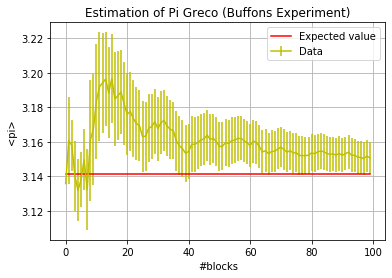

In [9]:
x = np.arange(nblocks)

pi,err_pi=np.loadtxt("Esercizio1.3/pigreco.txt", usecols=(0,1), delimiter=' ', unpack='true')

plt.figure()
plt.errorbar(x,pi,err_pi,color='y',label='Data')
plt.xlabel('#blocks')
plt.ylabel('<pi>')
plt.title('Estimation of Pi Greco (Buffons Experiment)')
plt.grid(True)
plt.plot(x,real+np.pi,color='r',label='Expected value')
plt.legend()

plt.show()

Prima di concludere, è interessante spendere qualche parole riguardo un'importante problematica emersa durante la scrittura del codice, relativa al campionamento uniforme dei segmenti all'interno del piano. Non potendo utilizzare esplicitamente il numero $\pi$ (in quanto grandezza da stimare all'interno della simulazione), è venuta meno la possibilità di generare i punti estremanti di ogni segmento sfruttando le coordinate polari ovvero campionando l'angolo di inclinazione dall'intervallo $[0,2\pi)$ secondo una distribuzione di probabilità uniforme. Ciò ha reso necessario l'introduzione di un nuovo metodo di campionamento basato sulla **Tecnica del Rigetto**: una volta generato il primo estremo del segmento, estraggo uniformemente due numeri $x$ e $y$ dall'intervallo $[0,1)$ e controllo se essi cadono all'interno della circonferenza di raggio unitario centrata nell'origine. In caso affermativo, posso ricavare l'angolo di inclinazione del segmento $\theta$ dalle formule riportate di seguito.

$$\theta = \begin{cases} \arccos \left( \frac{x}{\sqrt{x^2 + y^2}}  \right) \; \; se \; y \geq 0 \\ -\arccos \left( \frac{x}{\sqrt{x^2 + y^2}}  \right) \; \; se \; y < 0 \end{cases}$$

In caso contrario, rigetto la coppia di dati e ne genero una nuova, finché non viene soddisfatta la condizione di accettazione dell'algortitmo.

Chiaramente l'implementazione di una tecnica di questo tipo ha finito per ridurre, anche se non in maniera apprezzabie, l'efficienza dell'algoritmo, in quanto, al termine della simulazione, una frazione consistente di dati finisce per essere rigettata.